In [61]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import sys
sys.path.append('/home/eduardo/PycharmProjects/treemap-analysis/code')

import Parser
import TemporalMetrics

In [62]:
dataset_id = 'gimp'

In [63]:
technique_list = Parser.list_techniques()
df_tech_list = []
      
for technique_id in technique_list:
    history = Parser.parse_rectangles(technique_id, dataset_id)
    df_tech = pd.DataFrame()
    for i in range(1, len(history)):
        df_temp = TemporalMetrics.delta_vis(history[i - 1], history[i])
        df_temp = pd.merge(df_temp, TemporalMetrics.delta_data_by_area(history[i - 1], history[i]))
        df_tech = pd.concat([df_tech, df_temp])
    #print(technique_id)
    #print(df_tech.shape)
    df_tech_list.append(df_tech.copy())

In [64]:
def cm2inch(value):
    return value/2.54

# Scatter plot delta vis (y) and delta data (x)
X is scaled to remove 0.1% of largest values

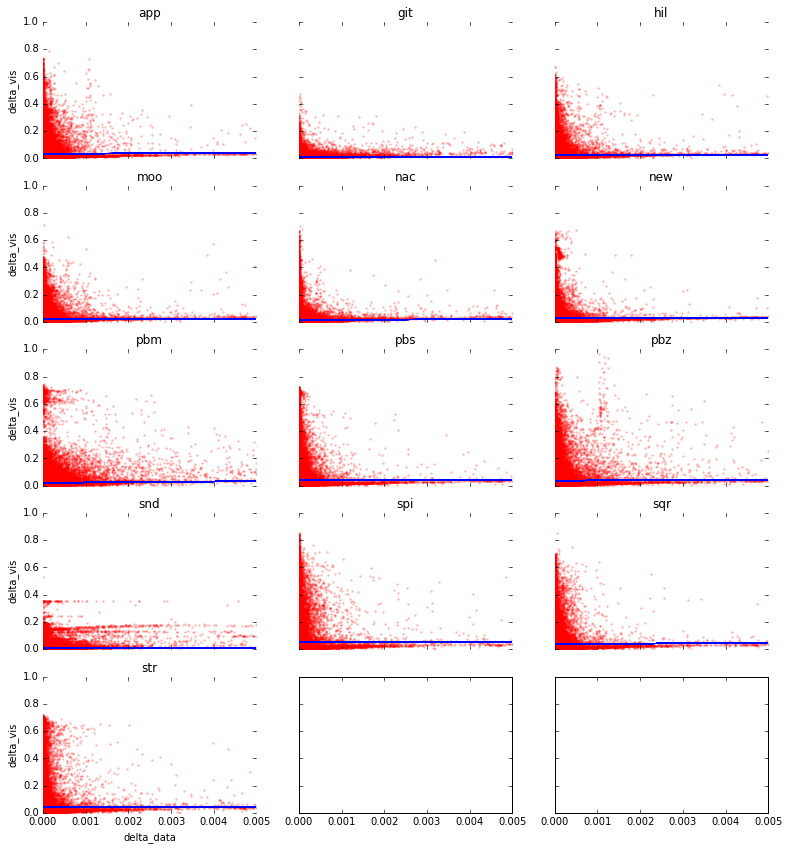

In [65]:
nrow = 5
ncol = 3
fig, axs = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(cm2inch(2*16.5), cm2inch(2*18)))
xlim = (df_tech_list[0]['delta_data']).quantile(0.999) # Remove the 0.1% outliers
for i, ax in enumerate(fig.axes):
    if i < len(technique_list):
        ax.set_title(technique_list[i])
        df = df_tech_list[i]
        
        df.plot.scatter(x='delta_data', y='delta_vis', c='r', s=5, alpha=0.3, lw=0, ax=ax)
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(df['delta_data'], df['delta_vis'])
        line = np.poly1d([slope, intercept])(df['delta_data'])
        ax.plot(df['delta_data'], line, 'b-')
        
        ax.set_xlim([0, xlim])
        ax.set_ylim([0, 1])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        


# Scatter plot delta vis (y) and delta data (x)
Larger x scale. Should I put the regression values (r, error, etc)?

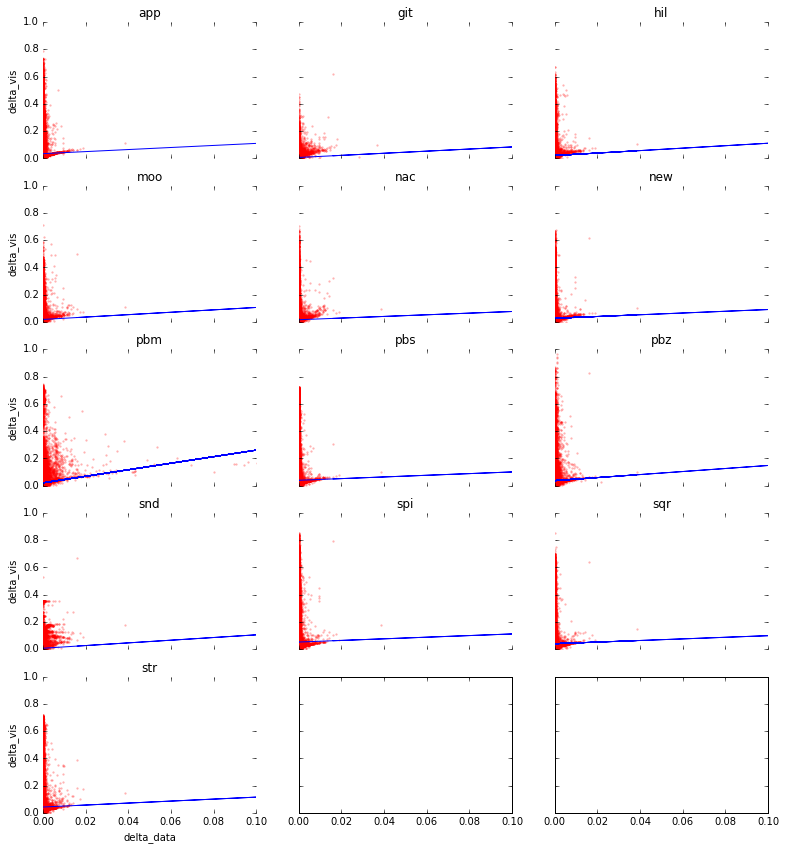

In [89]:
nrow = 5
ncol = 3
fig, axs = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(cm2inch(2*16.5), cm2inch(2*18)))
for i, ax in enumerate(fig.axes):
    if i < len(technique_list):
        ax.set_title(technique_list[i])
        df = df_tech_list[i]
        
        df.plot.scatter(x='delta_data', y='delta_vis', c='r', s=5, alpha=0.3, lw=0, ax=ax)
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(df['delta_data'], df['delta_vis'])
        line = np.poly1d([slope, intercept])(df['delta_data'])
        ax.plot(df['delta_data'], line, 'b-')
        
        ax.set_xlim([0, 0.1])
        ax.set_ylim([0, 1])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

# Managed to get kde working with a log scale
Below are variants of the stretch and colormap

TypeError: 'NoneType' object is not iterable

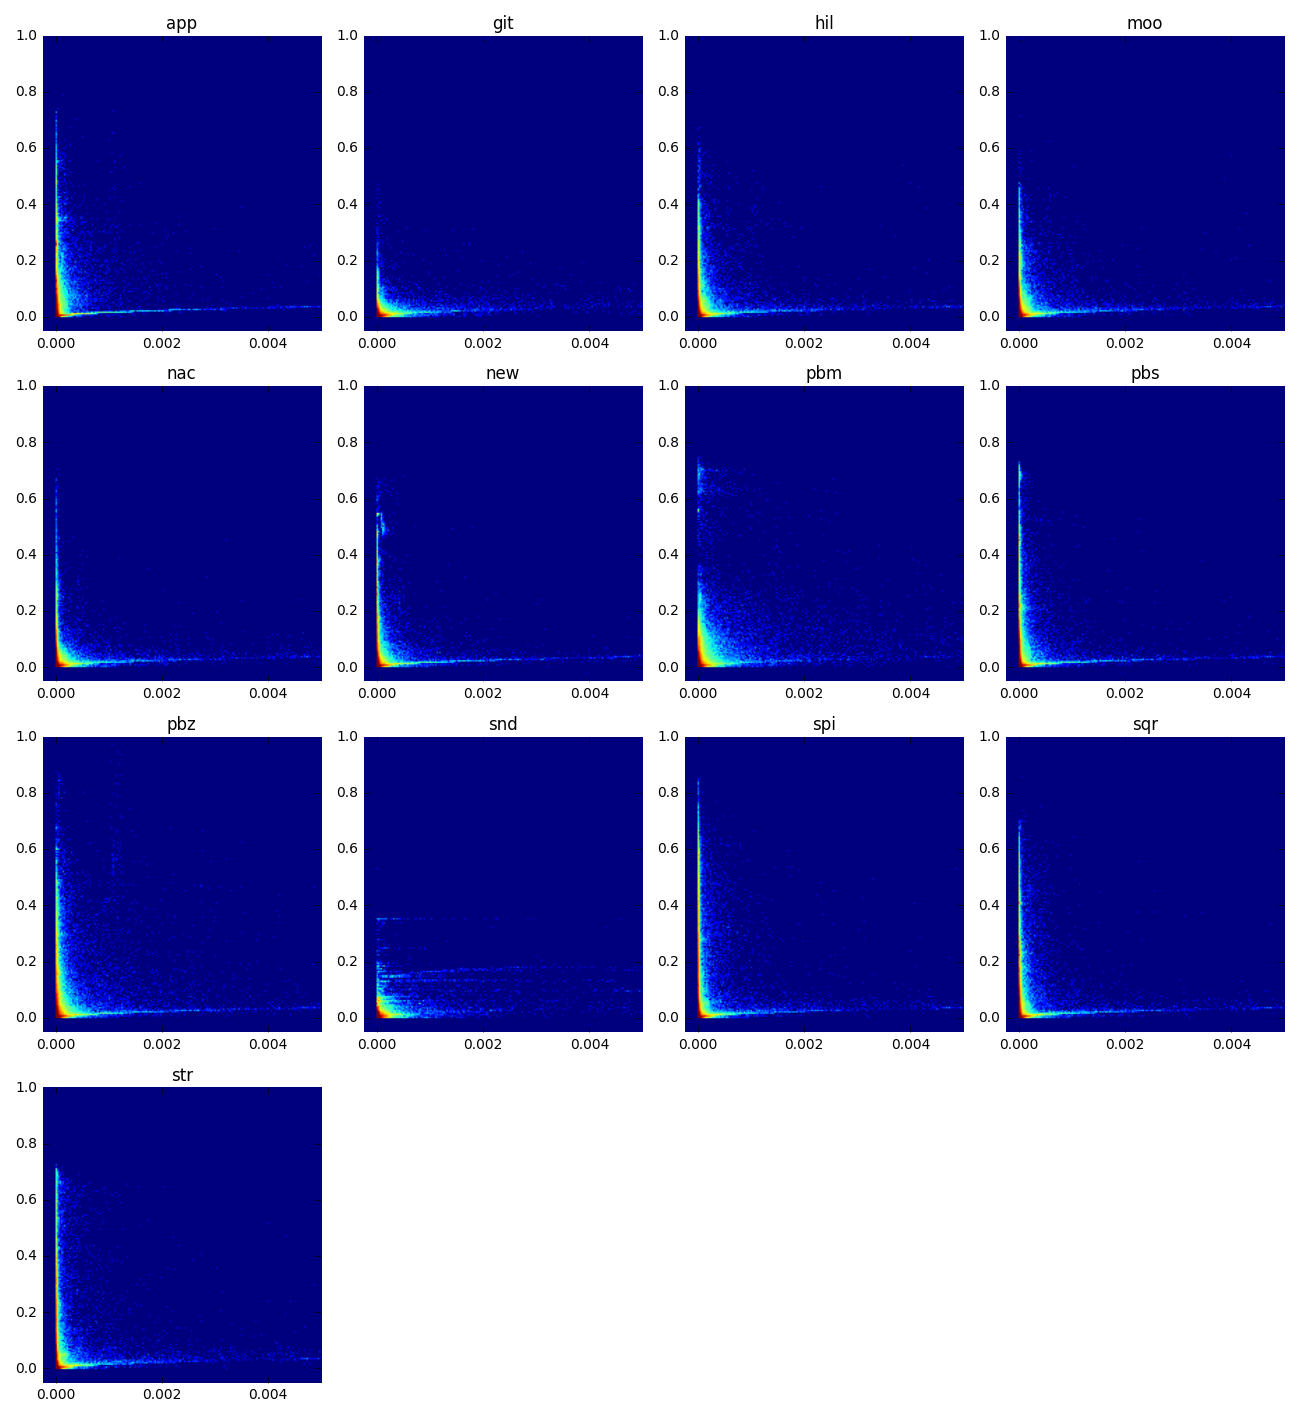

In [88]:
import mpl_scatter_density
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(vmin=0., vmax=1000, stretch=LogStretch())

xlim = (df_tech_list[0]['delta_data']).quantile(0.999) # Remove the 0.1% outliers
plt.rcParams['image.cmap'] = 'jet'

nrow = 4
ncol = 4
#fig, axs = plt.subplots(nrow, ncol, , , projection='scatter_density')
fig = plt.figure(figsize=(cm2inch(2*16.5), cm2inch(2*18)))
for i in range(len(technique_list)):
    df = df_tech_list[i]

    ax = fig.add_subplot(nrow, ncol, i+1, projection='scatter_density')        
    ax.set_title(technique_list[i])
    
    ax.scatter_density(df['delta_data'].values, df['delta_vis'].values, norm=norm)

    ax.set_xlim([-0.05*xlim, xlim])
    ax.set_ylim([-0.05, 1])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    locator = plt.MaxNLocator(nbins=4) # with 3 bins you will have 4 ticks
    ax.xaxis.set_major_locator(locator)


plt.tight_layout()

plt.show()
fig.savefig('kde1.png')
#plt.imshow(a,aspect='auto',cmap=get_cmap(m),origin="lower")
from IPython.display import Image
Image(filename='kde1.png')

TypeError: 'NoneType' object is not iterable

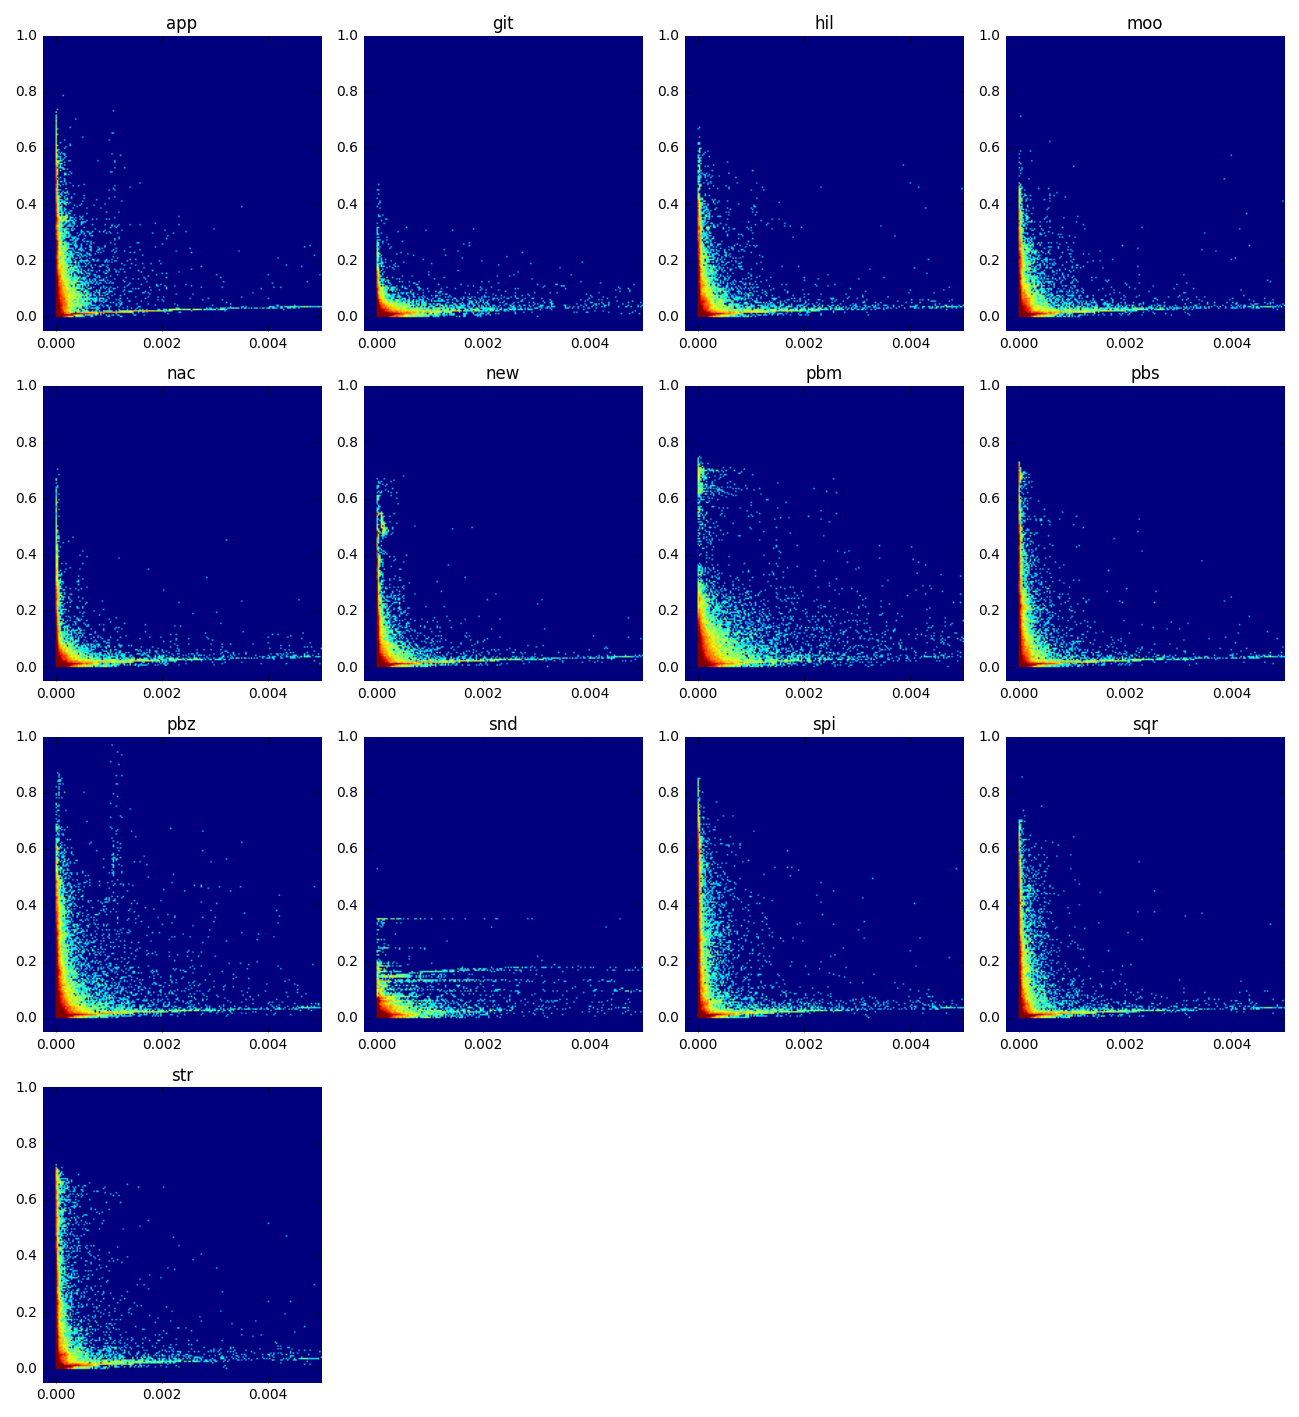

In [90]:
import mpl_scatter_density
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(vmin=0., vmax=100, stretch=LogStretch())

xlim = (df_tech_list[0]['delta_data']).quantile(0.999) # Remove the 0.1% outliers
plt.rcParams['image.cmap'] = 'jet'

nrow = 4
ncol = 4
#fig, axs = plt.subplots(nrow, ncol, , , projection='scatter_density')
fig = plt.figure(figsize=(cm2inch(2*16.5), cm2inch(2*18)))
for i in range(len(technique_list)):
    df = df_tech_list[i]

    ax = fig.add_subplot(nrow, ncol, i+1, projection='scatter_density')        
    ax.set_title(technique_list[i])
    
    ax.scatter_density(df['delta_data'].values, df['delta_vis'].values, norm=norm)

    ax.set_xlim([-0.05*xlim, xlim])
    ax.set_ylim([-0.05, 1])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    locator = plt.MaxNLocator(nbins=4) # with 3 bins you will have 4 ticks
    ax.xaxis.set_major_locator(locator)


plt.tight_layout()

plt.show()
fig.savefig('kde2.png')
#plt.imshow(a,aspect='auto',cmap=get_cmap(m),origin="lower")
from IPython.display import Image
Image(filename='kde2.png')

In [91]:
import mpl_scatter_density
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(vmin=0., vmax=100, stretch=LogStretch())

xlim = (df_tech_list[0]['delta_data']).quantile(0.999) # Remove the 0.1% outliers

plt.rcParams['image.cmap'] = 'inferno'

nrow = 4
ncol = 4
#fig, axs = plt.subplots(nrow, ncol, , , projection='scatter_density')
fig = plt.figure(figsize=(cm2inch(2*16.5), cm2inch(2*18)))
for i in range(len(technique_list)):
    df = df_tech_list[i]

    ax = fig.add_subplot(nrow, ncol, i+1, projection='scatter_density')        
    ax.set_title(technique_list[i])
    
    ax.scatter_density(df['delta_data'].values, df['delta_vis'].values, norm=norm)

    ax.set_xlim([0, xlim])
    ax.set_ylim([0, 1])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    locator = plt.MaxNLocator(nbins=4) # with 3 bins you will have 4 ticks
    ax.xaxis.set_major_locator(locator)


plt.tight_layout()

plt.show()
fig.savefig('kde.png')

TypeError: 'NoneType' object is not iterable

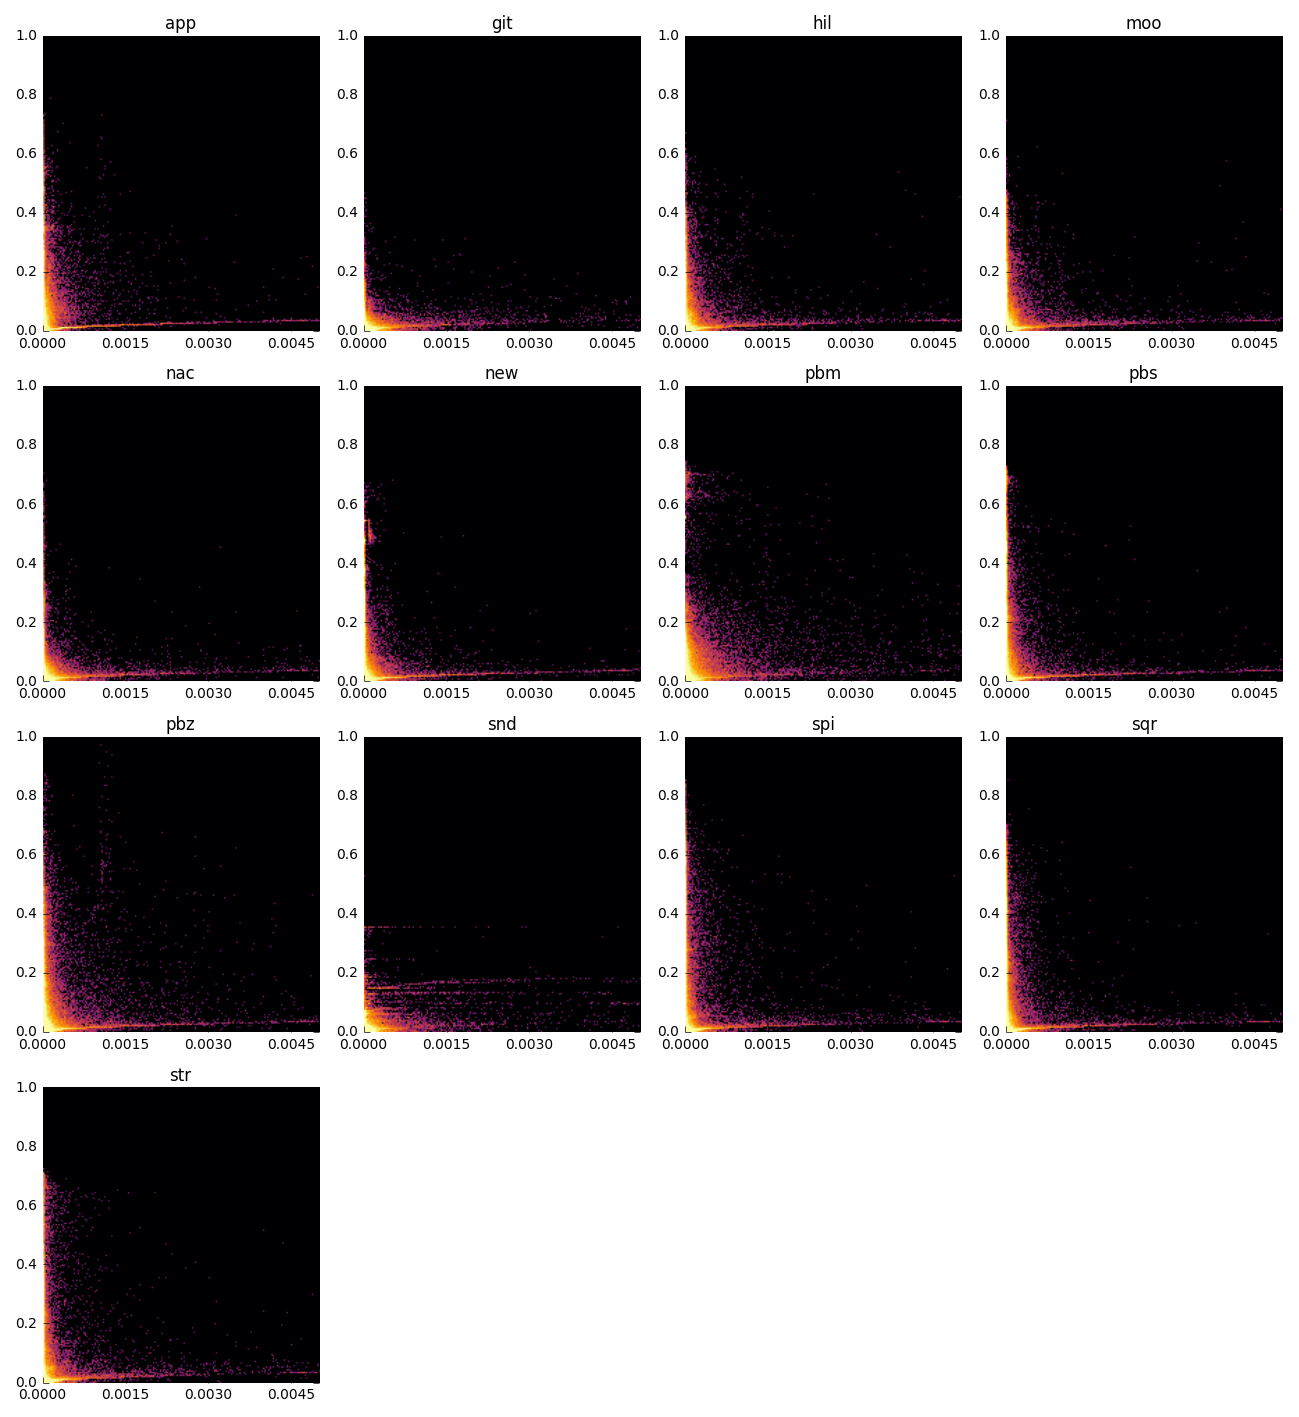

In [92]:
from IPython.display import Image
Image(filename='kde.png')